# Первая часть проекта. Эксперименты

## 2. Исследуем, как при фиксированных параметрах распределения взаимосвязаны параметры построения графов и их характеристики

In [21]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from dataclasses import dataclass
from tqdm import tqdm
from itertools import product
import sys
import os
from characteristics_experimental import *

sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '../common_tools')))
from graphs import KNN_Graph, Distance_Graph

In [6]:
lambda_param = 2 / np.sqrt(3)
alpha_param = 3

In [19]:
n_s = np.arange(1, 180, 10)
k_s = np.arange(1, 180, 10)
d_s = np.arange(0.01, 3, 0.07)

results = pd.DataFrame(columns=["n", "distrib_type", "graph_type", "graph_parameter", "characteristic_type", "characteristic_value"])

In [22]:
results

,n,distrib_type,graph_type,graph_parameter,characteristic_type,characteristic_value
0,1,exp,dist,0.01,components,1.0
1,1,exp,dist,0.01,chromatic,1.0
2,1,pareto,dist,0.01,components,1.0
3,1,pareto,dist,0.01,chromatic,1.0
4,1,exp,dist,0.08,components,1.0
...,...,...,...,...,...,...
9811,181,pareto,knn,149.00,chromatic,149.0
9812,181,exp,knn,150.00,components,1.0
9813,181,exp,knn,150.00,chromatic,150.0
9814,181,pareto,knn,150.00,components,1.0


In [ ]:
for n in tqdm(n_s):
    for k in np.arange(1, n):
        average_characteristics = get_average_characteristics(lambda_param, 1, n, k, 0.01)

        results.loc[len(results)] = [n, "exp", "knn", k, "components", average_characteristics.knn_exp_components]

        results.loc[len(results)] = [n, "exp", "knn", k, "chromatic", average_characteristics.knn_exp_chromatic]

        results.loc[len(results)] = [n, "pareto", "knn", k, "components", average_characteristics.knn_pareto_components]

        results.loc[len(results)] = [n, "pareto", "knn", k, "chromatic", average_characteristics.knn_pareto_chromatic]

    for d in d_s:
        average_characteristics = get_average_characteristics(1, alpha_param, n, 1, d)

        results.loc[len(results)] = [n, "exp", "dist", d, "components", average_characteristics.distance_exp_components]

        results.loc[len(results)] = [n, "exp", "dist", d, "chromatic", average_characteristics.distance_exp_chromatic]

        results.loc[len(results)] = [n, "pareto", "dist", d, "components", average_characteristics.distance_pareto_components]

        results.loc[len(results)] = [n, "pareto", "dist", d, "chromatic", average_characteristics.distance_pareto_chromatic]

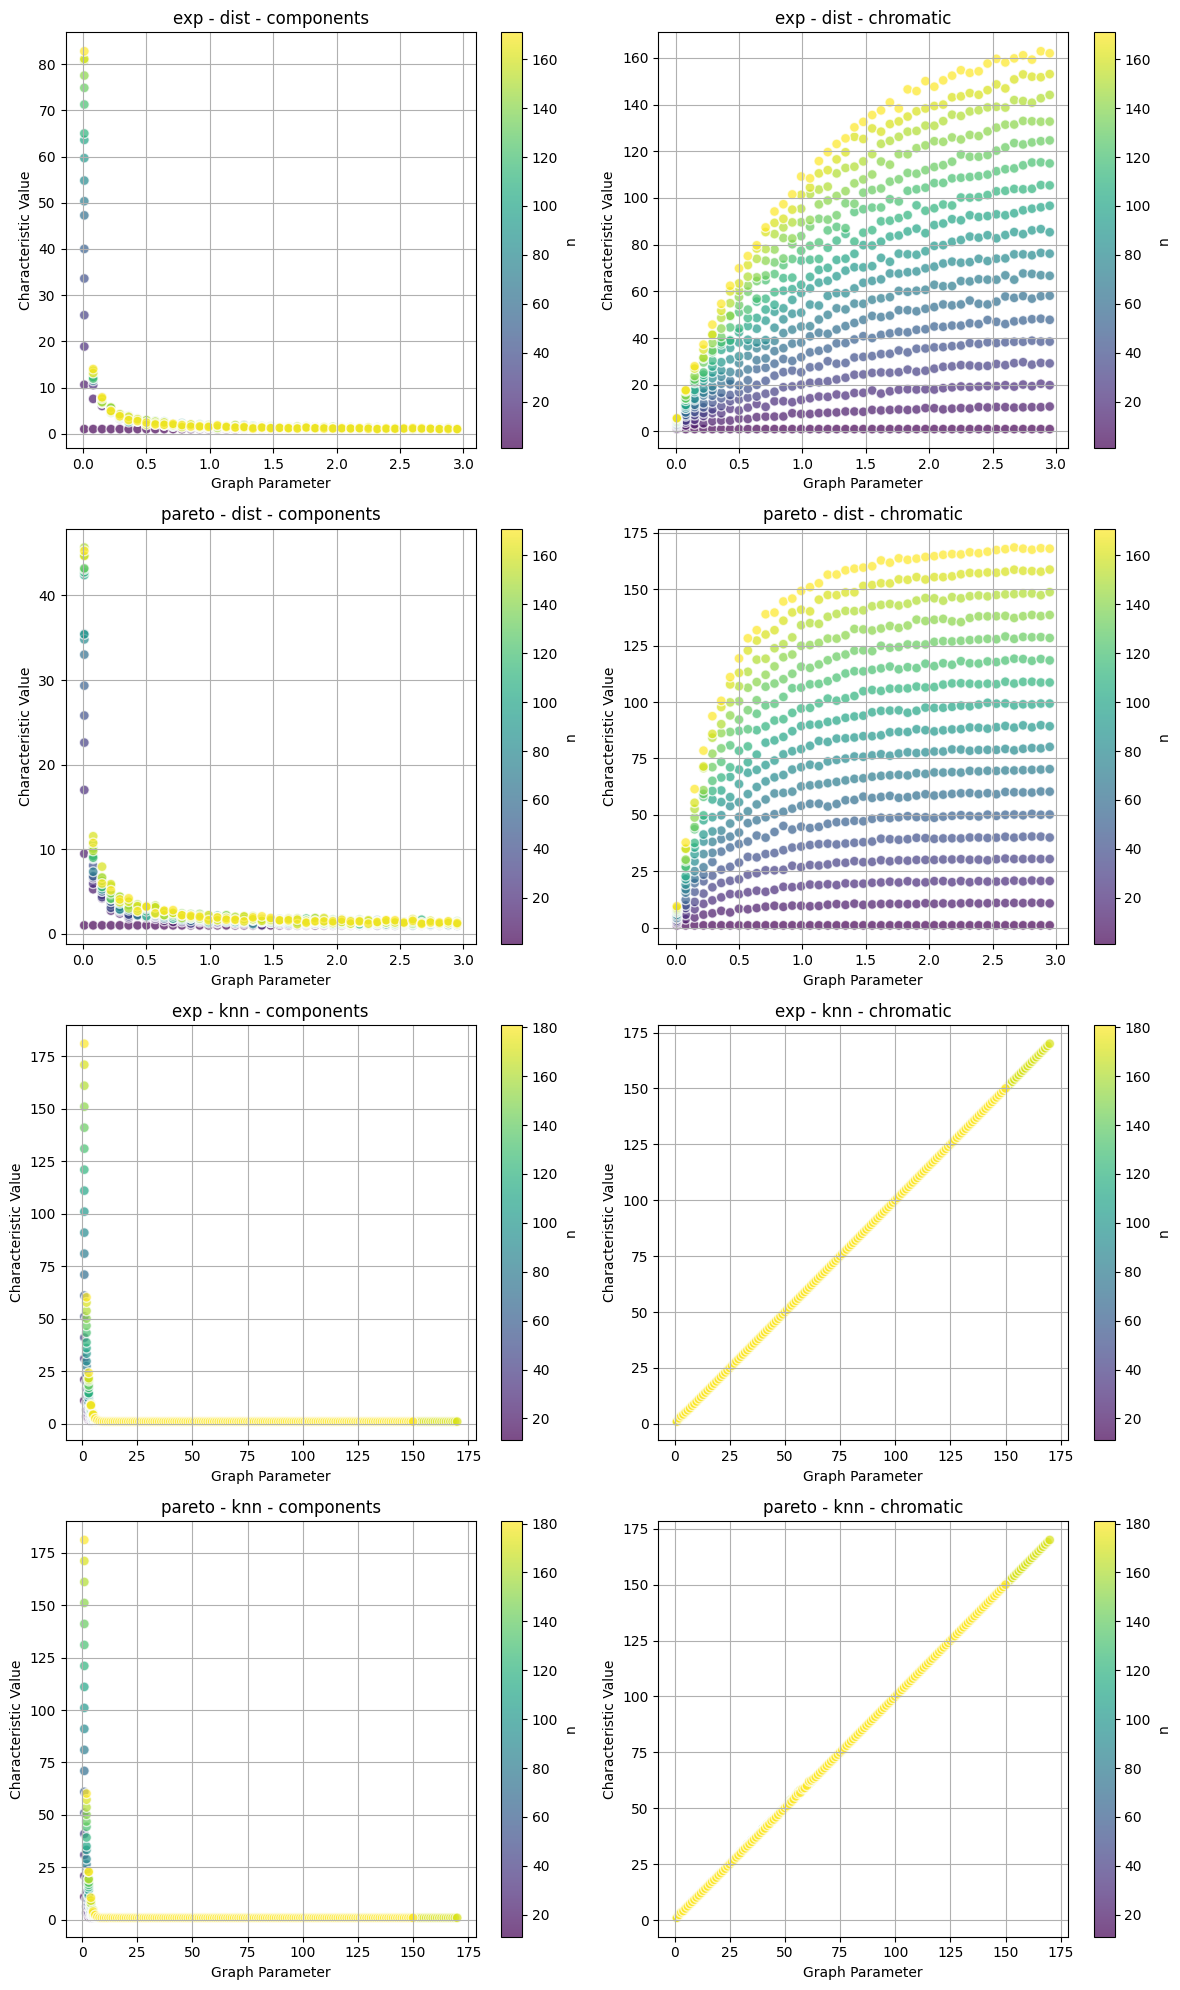

In [28]:
unique_combinations = results[['distrib_type', 'graph_type', 'characteristic_type']].drop_duplicates()

num_plots = len(unique_combinations)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols  # Округляем вверх

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))

for i, (_, row) in enumerate(unique_combinations.iterrows()):
    distrib_type = row['distrib_type']
    graph_type = row['graph_type']
    characteristic_type = row['characteristic_type']

    filtered_data = results[
        (results['distrib_type'] == distrib_type) &
        (results['graph_type'] == graph_type) &
        (results['characteristic_type'] == characteristic_type)
    ]

    scatter = axes[i].scatter(
        filtered_data['graph_parameter'],
        filtered_data['characteristic_value'],
        c=filtered_data['n'],
        cmap='viridis',
        alpha=0.7,
        edgecolor='w',
        s=50
    )

    cbar = plt.colorbar(scatter, ax=axes[i])
    cbar.set_label('n')

    axes[i].set_title(f'{distrib_type} - {graph_type} - {characteristic_type}')
    axes[i].set_xlabel('Graph Parameter')
    axes[i].set_ylabel('Characteristic Value')
    axes[i].grid()

for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Наблюдается более выраженная взаимосвязь между величинами, нежели в первом эксперименте (заметим, что взаимосвязь сильнее проявляется при больших n)